# Hakathon

<table>
<tr>
<th> Column Name </th>
<th> Column Description </th>
<th> Column Value Examples </th>
</tr>
<tr>

<td>
```
ID
Gender
Customer_Type
Age
Type_Travel
Travel_Class
Travel_Distance 
Departure_Delay_in_Mins
Arrival_Delay_in_Mins
```
</td>

<td>
```
Unique ID of the passenger
Gender of the passenger
Loyalty type of the passenger
Gge of the passenger
Purpose of travel for the passenger
Train class that the passenger traveled in
Distance traveled by the passenger
Delay (in minutes) in train departure
Delay (in minutes) in train arrival
```
</td>

<td>
```
Continuous values like 98800001, etc.
"Male / Female"
"Loyal Customer / Disloyal Customer"
Continuous values like 48, 52, 9, etc.
"Personal Travel / Business Travel"
"Business / Eco"
Continuous values like 272, 780, etc.
Continuous values like 9, 15, etc.
Continuous values like 0, 15, etc.
```
</td>
</tr>
</table>

| Column Name                  | Columns Descrition                         |Column Value Examples
| -----------------------------| -------------------------------------------|-------------------------------------
| ID                           | Unique ID of the passenger                 |Continuous values like 98800001, etc.
| Gender                       | Gender of the passenger                    |"Male / Female"
| Customer_TypeCustomer_Type   | Loyalty type of the passenger              |"Loyal Customer / Disloyal Customer"
| Age                          | Gge of the passenger                       |Continuous values like 48, 52, 9, etc.
| Type Travel                  | Purpose of travel for the passenger        |"Personal Travel / Business Travel"
| Travel Class                 | Train class that the passenger traveled in |"Business / Eco"
| Travel_Distance              | Distance traveled by the passenger         |Continuous values like 272, 780, etc.
| Departure_Delay_in_Mins      | Delay (in minutes) in train departure      |Continuous values like 9, 15, etc.
| Arrival_Delay_in_Mins        | Delay (in minutes) in train arrival        |Continuous values like 0, 15, etc.

In [1]:
# Packages 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Additional Plots 
from plotnine import ggplot, geom_point, aes, geom_smooth, facet_wrap, labs, theme_bw,scale_fill_manual, scale_fill_discrete
# from plotnine.data import mtcars

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from scipy.stats import zscore

from sklearn.model_selection import train_test_split


# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# To tune the model
from sklearn.model_selection import GridSearchCV

# Metrics to evaluate the model (CART Models)
from sklearn import metrics

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score, recall_score

In [2]:
# Importing data
trav_train = pd.read_csv("Traveldata_train.csv")
trav_test = pd.read_csv("Traveldata_test.csv")
sur_train = pd.read_csv("Surveydata_train.csv")
sur_test = pd.read_csv("Surveydata_test.csv")

In [3]:
trav_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [4]:
trav_train.info()
# Items needing cleaning: Gender, Customer_Type, Age, Type_Travel, Departure_Delay_in_Mins, Arrival_Delay_in_Mins

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [5]:
# Separating categories and numerics 
cat_list = list()
num_list = list()
for col in trav_train.columns:
#     print(trav_train[col].dtypes) #dtypes
    if trav_train[col].dtypes == 'object':
        print(col,' Categories:',trav_train[col].unique())
        print(round((trav_train[col].value_counts()/trav_train.shape[0])*100,3),'\n')
        cat_list.append(col)
    else:
        num_list.append(col)

Gender  Categories: ['Female' 'Male' nan]
Female    50.663
Male      49.256
Name: Gender, dtype: float64 

Customer_Type  Categories: ['Loyal Customer' 'Disloyal Customer' nan]
Loyal Customer       73.982
Disloyal Customer    16.534
Name: Customer_Type, dtype: float64 

Type_Travel  Categories: [nan 'Personal Travel' 'Business Travel']
Business Travel    62.108
Personal Travel    28.116
Name: Type_Travel, dtype: float64 

Travel_Class  Categories: ['Business' 'Eco']
Eco         52.281
Business    47.719
Name: Travel_Class, dtype: float64 



Skew : 0.0


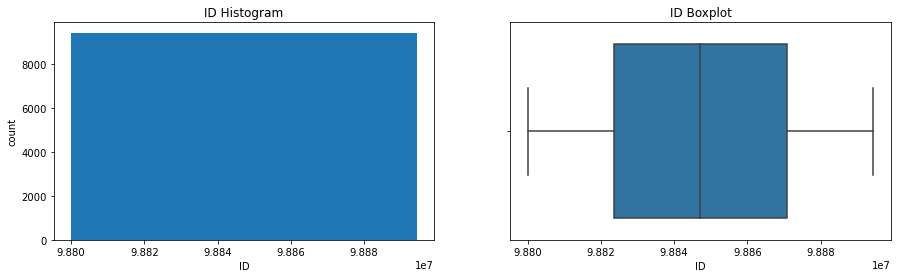

Skew : -0.0


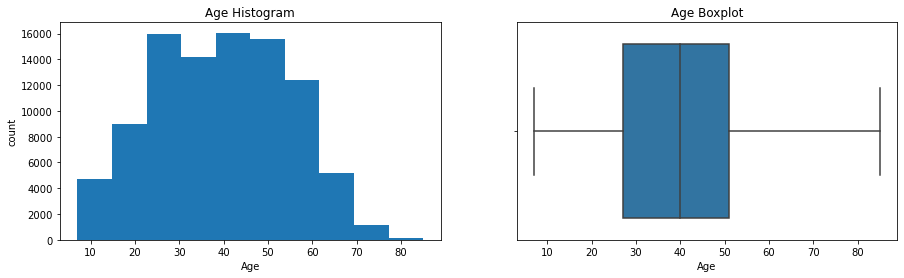

Skew : 0.47


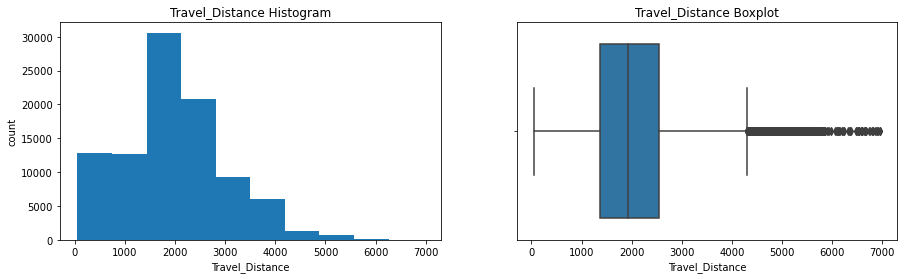

Skew : 7.16


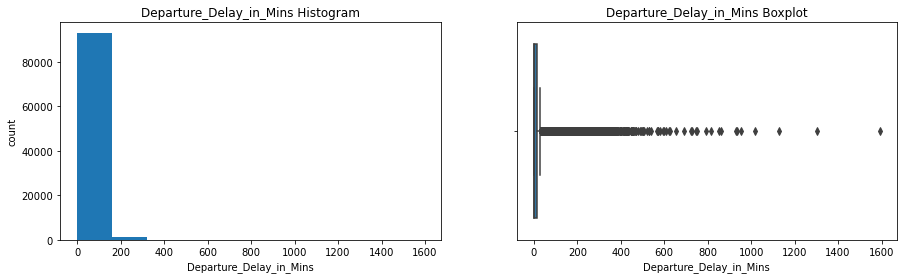

Skew : 6.98


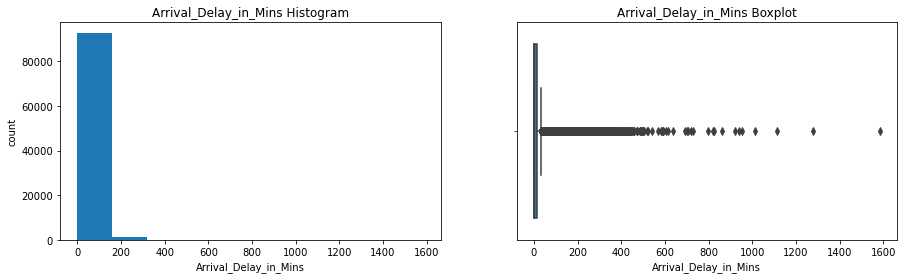

In [6]:
# Numerical columns 
for col in num_list:
    
    print('Skew :', round(trav_train[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1,2,1)
   
    plt.title(col + ' Histogram')
    
    trav_train[col].hist(bins = 10, grid = False)
    
#     plt.tite
    plt.xlabel(col)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    plt.title(col + ' Boxplot')
    sns.boxplot(x = trav_train[col])
    
    plt.show()

In [7]:
# Cleaning the data
trav_train.loc[trav_train['Customer_Type'].isnull(),'Customer_Type'] =  trav_train['Customer_Type'].mode()[0]
trav_train.loc[trav_train['Age'].isnull(),'Age'] =  trav_train['Age'].mean()
trav_train.loc[trav_train['Type_Travel'].isnull(),'Type_Travel'] =  trav_train['Type_Travel'].mode()[0] 
trav_train.loc[trav_train['Departure_Delay_in_Mins'].isnull(),'Departure_Delay_in_Mins'] =  trav_train['Departure_Delay_in_Mins'].median() 
trav_train.loc[trav_train['Arrival_Delay_in_Mins'].isnull(),'Arrival_Delay_in_Mins'] =  trav_train['Arrival_Delay_in_Mins'].median() 
trav_train = trav_train.dropna() # Dropping the remainder of the NA values in the gender column

In [ ]:
trav_train.info()

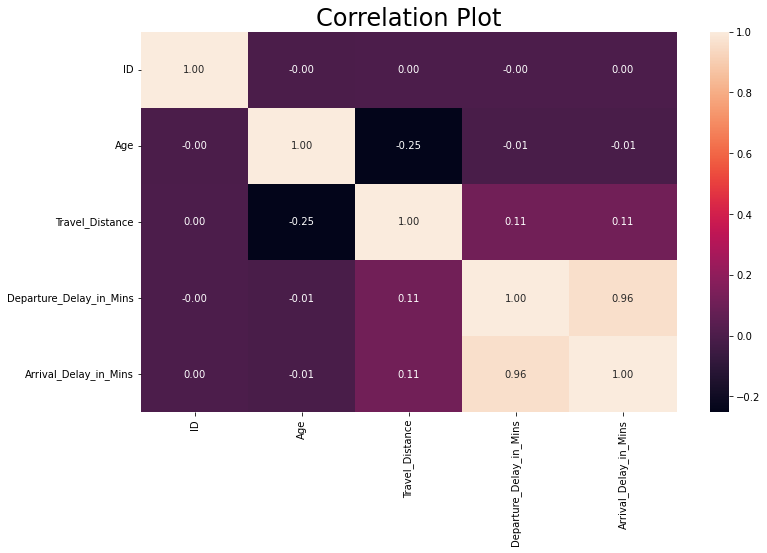

In [8]:
plt.figure(figsize = (12, 7))

sns.heatmap(trav_train[num_list].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Plot", size= 24)
plt.show()